##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 104 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 19.32 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/TestImages/Morphology
Pontilhismo2.png  Pontilhismo.png  TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/Morphology/
!ls

/content/TestImages/Morphology
Pontilhismo2.png  Pontilhismo.png  TestImages


# **Questão:**

\

O filtro morfolóógico top-hat negro é dado pela seguinte expressão:

\

$ T_b (f) = f \;\; \mathbf{fec}\; \; B \;-\; f $

\

Esta operação retorna uma imagem contendo os objetos contíguos que:

 *   São menores que o elemento estruturante $B$, e
 *   que também são mais escuros que seu entorno.

\

A imagem de teste Pontilhismo2.png contém círculos de cor preta em de três tamnnhos distintos: 20 x 20; 60 x 60 e 100 x 100.

1. Com base no sua implementação do trabalho 4, complete o código a seguir para efetuar a segmentação dos discos grandes (diâmetro aproximado 100 px).  

2. Com base no exemplo https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html,  faça a detecção (obtenção dos modelos paramétricos) dos discos usando a transformada de Hough.

3. Analise e explique os resultados obtidos.



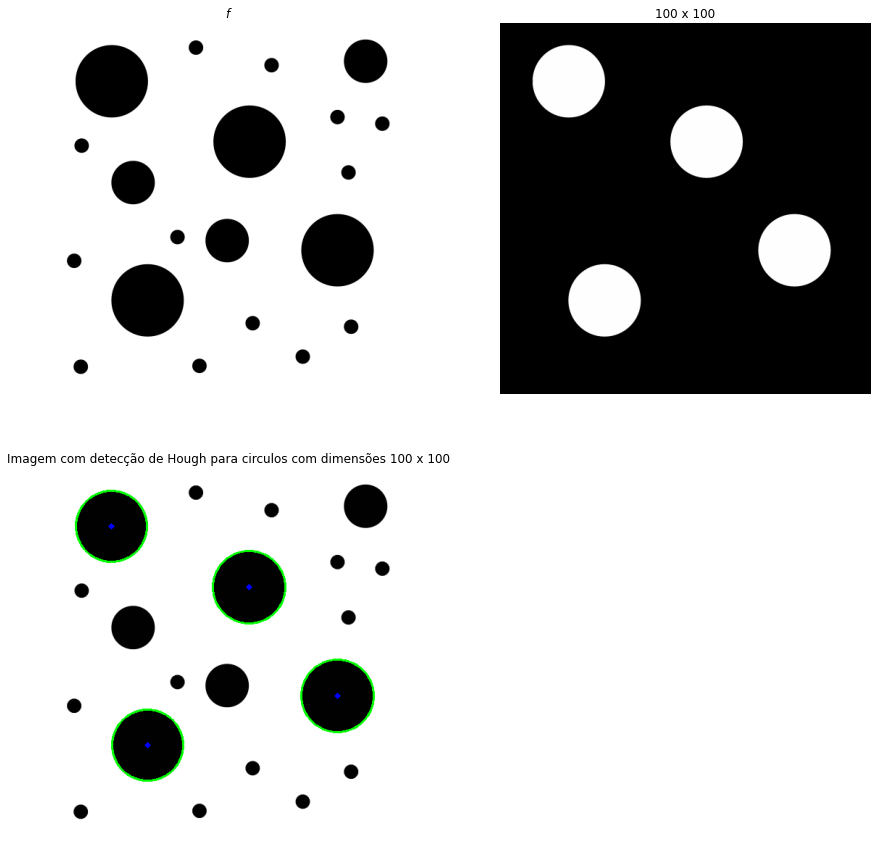

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def BlackTopHat_HoleDetection( f, B_Size ):
  B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, B_Size)
  # implemente nas linhas 9, 10 e 11 o filtro black top hat (item 1).
  toph = cv2.morphologyEx (f,cv2.MORPH_BLACKHAT, B)
  # no código a seguir a operação de abertura é usada para eliminar elementos pequenos persistentes oriundos das bordas dos círculos
  Baux = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  T = cv2.morphologyEx (toph, cv2.MORPH_OPEN, Baux)
  Topen = cv2.dilate(cv2.erode(T,Baux,iterations = 1), Baux, iterations = 1)
  return Topen

def Detect_Hough(k,d): # k é a imagem carregada, e d é a dimensão do círculo
 img = cv2.medianBlur(k,5)
 img2 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR) # obs: garante q a demarcação final apareça colorida
 rows = img.shape[0]
 circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,rows/8,
                            param1=100,param2=np.uint16((d/2)-5),minRadius=np.uint16((d/2)-5),maxRadius=np.uint16((d/2)+5)) #garante que os círculos classificados sejam SOMENTE aqueles com a dimensão definida
 circles = np.uint16(np.around(circles))
 for i in circles[0,:]:
    # demarcação do círculo
    cv2.circle(img2,(i[0],i[1]),i[2],(0,255,0),2)
    # demarcação do centro do círculo
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)
 return img2

f = cv2.imread('Pontilhismo2.png',0)

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.title('$f$')
plt.axis('off')
plt.imshow(f, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('100 x 100')
plt.axis('off')
plt.imshow(BlackTopHat_HoleDetection( f, (100,100))^BlackTopHat_HoleDetection( f, (60,60)) , cmap = 'gray')

plt.subplot(2,2,3)
plt.title('Imagem com detecção de Hough para circulos com dimensões 100 x 100')
plt.axis('off')
plt.imshow(Detect_Hough(f,100))



# **Questão**

A Transformada de Hough é uma ferramente de detecção de figuras geométricas ne uma figura. Ela é baseada num modelo analítico que relaciona espaço imagem à um espaço de parâmetros. Antes de qualquer coisa, precisamos saber que a Transformada de Hough não trabalha com a imagem original, e sim com uma imagem pré-processada. Em primeiro momento deve ocorrer uma detecção de bordas e então uma bilinearização desse resultado, e é justamente por isso que a Transformada de Hough não aceita uma inversa que seja capaz de recuperar os dados originais. Neste trabalho esse pré-processamento é dado pela função cv2.medianBlur(). Tendo a imagem bilinearizada a Transformada de Hough é aplicada e passa por cada pixel da imagem, ou seja, essa trasnformada pega as coordenada dos pixels pertencentes à figura geométrica detectada (pixel 'aceso') e as converte para um espaço de parâmetros analíticos. O modelo analítico de Hough deteca (a cada aplicação) um tipo diferente de objeto geométrico, tendo que ser auxiliado por uma função qualquer que defina os padrões objeto geométrico. No caso deste exercício, como estamos tratando da detecção de círculos, usamos a função cv2.HoughCircles(). Essa função, como esperado, só aceita imagens em escala de cinza como imagem de entrada, Neste exercício a imagem já é carregada em esala de cinza, caso contrário deveria haver uma conversão para que a função à aceitasse como parâmetro. O filtro morfológico top-hat negroé utilizado por ser responsável por detectar objetos que sejam mais escuros que o ambiente a sua volta na imagem de entrada e gerar objetos levemente menores que os mesmos numa imagem de saída. Quando o resultado de ambos os processos são comparados visualmente percebemos a detecção dos mesmos objetos em ambos métodos, o que era esperado devido ao fato de que ambos estão tratando da detecção dos mesmos tipos de objetos e tendo a mesma dimensão aplicada em cada função.
